# AMAZON CUSTOMERS DATA  ANALYSIS

## First steps!

In [1]:
import sqlite3
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from SQLite
1) **Stablish SQL connection**
2) **Run Query**

In [2]:
con = sqlite3.connect(r'D:\Desktop\proyectos udemi\amazon/database.sqlite')

In [3]:
# this is sql connection
type(con)

sqlite3.Connection

In [4]:
df = pd.read_sql_query('SELECT * FROM REVIEWS', con)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
#'HelpfulnessNumerator': people who found the review helpful
#'HelpfulnessDenominator': people who indicated wheather or not the review was helpful
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
# HelpfulnessNumerator has to be less than HelpfulnessDenominator, otherwise the row is not valid
# The 2 rows showed below are the invalid rows
df.loc[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [9]:
#these are all the valid rows
df_valid = df.loc[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Lets remove duplicated

In [10]:
#the duplicated rows will be the ones that have same UserId, same ProfileName, Time and Text.
#Es imposible escribir al mimso tiempo desde el mismo usuario reviews para distintos productos
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
#here we have all the duplicated rows
df_valid[df_valid.duplicated(subset=['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [12]:
data = df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [13]:
data.shape

(393931, 10)

In [14]:
data['Time'] = pd.to_datetime(data['Time'], unit = 's')

## ANALYSE TO WHAT USER AMAZON CAN RECOMMEND MORE PRODUCT

In [15]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [16]:
recommend_df = data.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by = 'ProductId',ascending=False)
recommend_df.head()

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211


In [17]:
#rename columns
recommend_df.columns = ['Number_Of_Summaries','num_text','avg_score','No_of_prods_purchased']

In [18]:
recommend_df.head()

,Number_Of_Summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211


In [19]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [20]:
recommend_df['No_of_prods_purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

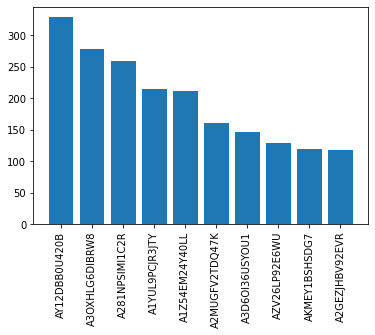

In [21]:
plt.bar(recommend_df.index[0:10],recommend_df['No_of_prods_purchased'][0:10].values)
plt.xticks(rotation = 'vertical')
plt.show()

## ANALYSING WHICH PRODUCT HAS GOOD NUMBER OF REVIEWS

In [22]:
result_df = pd.DataFrame(data.groupby('ProductId')['ProductId'].count())
result_df.index.name = None
result_df.sort_values(by='ProductId',ascending=False)

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B0035H5F50,1
B0005ZIWV4,1
B0035GS2JW,1
B0035G7PDQ,1


In [23]:
#another way of doing it
data['ProductId'].value_counts().to_frame()

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [24]:
#With this we get the top products with more than 500
result_df[result_df['ProductId']>500].index

Index(['B000KV61FC', 'B000NMJWZO', 'B000UBD88A', 'B0013NUGDE', 'B001EO5Q64',
       'B002QWP89S', 'B003B3OOPA', 'B005K4Q37A', 'B005ZBZLT4', 'B007JFMH8M',
       'B0090X8IPM'],
      dtype='object')

In [25]:
freq_prod_is = result_df[result_df['ProductId']>500].index
freq_prod_is

Index(['B000KV61FC', 'B000NMJWZO', 'B000UBD88A', 'B0013NUGDE', 'B001EO5Q64',
       'B002QWP89S', 'B003B3OOPA', 'B005K4Q37A', 'B005ZBZLT4', 'B007JFMH8M',
       'B0090X8IPM'],
      dtype='object')

In [26]:
freq_prod_df = data[data['ProductId'].isin(freq_prod_is)]
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


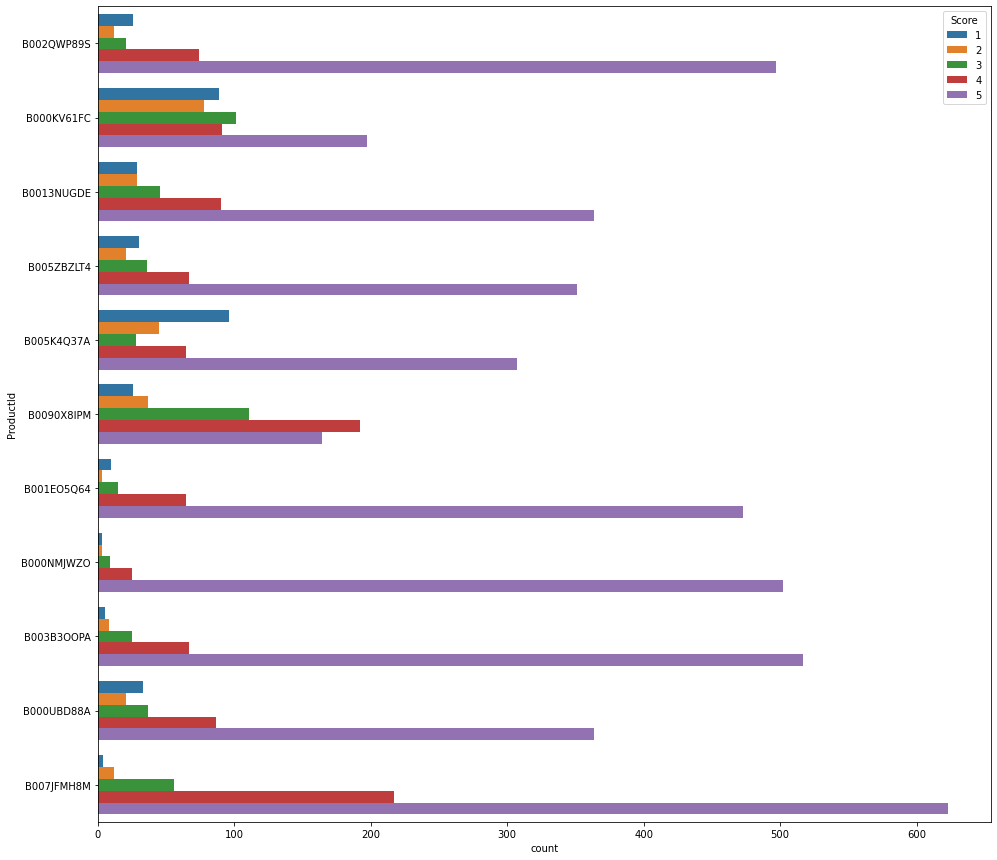

In [27]:
plt.figure(figsize=(16,15))
sns.countplot(y = 'ProductId',data= freq_prod_df, hue = 'Score')
plt.show()

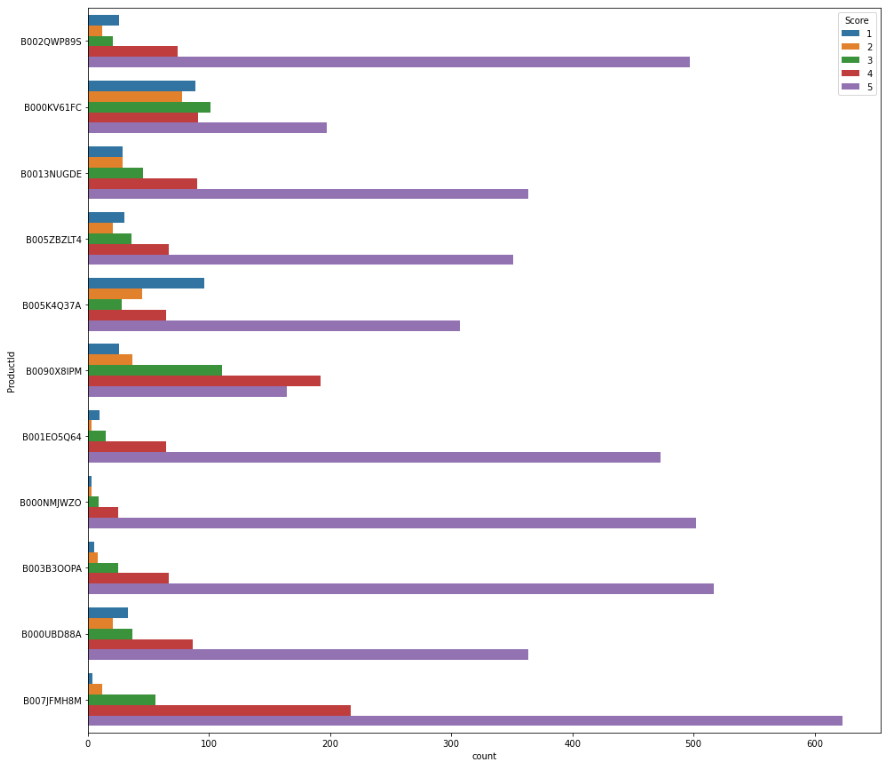

## UNDERSTANDING BEHAVIOURS OF AMAZONG USERS

### Is there any difference between frequent viewers & not frequent viewers

In [28]:
x = data['UserId'].value_counts()
x['A21U4DR8M6I9QN']

24

In [29]:
data['viewer_type'] = data['UserId'].apply(lambda user: 'frequent' if x[user] < 50 else 'not frequent')

In [30]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,frequent


In [31]:
not_freq_df = data[data['viewer_type'] == 'not frequent']

In [32]:
freq_df = data[data['viewer_type'] == 'frequent']

<AxesSubplot:>

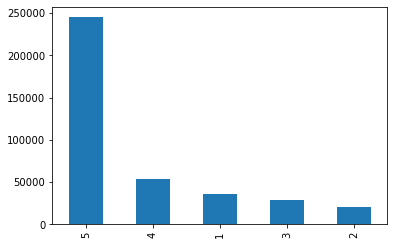

In [33]:
freq_df['Score'].value_counts().plot(kind = 'bar')

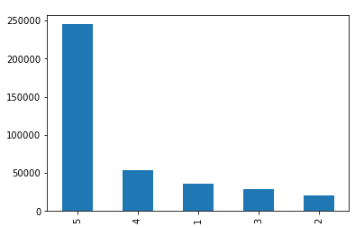

In [34]:
freq_df['Score'].value_counts()/len(freq_df)*100

5    63.762085
4    14.069388
1     9.350462
3     7.504818
2     5.313247
Name: Score, dtype: float64

In [35]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

5    61.461197
4    21.146120
3     9.674350
2     3.954324
1     3.764009
Name: Score, dtype: float64

## ANALYSING YOUR FREQUENT USERS

Are frequent users more verbose?

In [36]:
#We will use lenght of text to calculate distributions
data[['UserId','Text']]

,UserId,Text
0,A3SGXH7AUHU8GW,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,This is a confection that has been around a fe...
3,A395BORC6FGVXV,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,Great taffy at a great price. There was a wid...
...,...,...
568449,A28KG5XORO54AY,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,These are the BEST treats for training and rew...


In [37]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [38]:
len(data['Text'][0].split(' '))

49

In [39]:
def calculate_lenght(text):
    return len(text.split(' '))

In [40]:
data['Text_lenght'] = data['Text'].apply(calculate_lenght)

In [41]:
not_freq_df = data[data['viewer_type'] == 'not frequent']
freq_df = data[data['viewer_type'] == 'frequent']

In [42]:
not_freq_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_lenght
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,not frequent,22
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,2008-05-02,Great taste and convenience,We really like the McCann's steel cut oats but...,not frequent,44
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,2007-10-19,good,Good oatmeal. I like the apple cinnamon the b...,not frequent,50
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,2011-09-19,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,not frequent,134
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,2011-04-03,Good Licorice,Twizzlers brand licorice is much better than t...,not frequent,47
...,...,...,...,...,...,...,...,...,...,...,...,...
568238,568239,B002OXLXLG,A1Z54EM24Y40LL,c2,0,0,5,2011-07-14,Great replacement for the Girl Scout version!,If you failed to purchase enough of the Mint G...,not frequent,111
568261,568262,B00374ZKQ0,A2GEZJHBV92EVR,History buff,0,0,5,2012-08-16,Very good alternative to sugar.,I have tried many of the no sugar sweeteners o...,not frequent,49
568317,568318,B0013Z0PTW,A1ODOGXEYECQQ8,Nuknuk,0,0,4,2008-11-17,Good Tasting Granola Bars,Most health bars taste awful. Fiber One Grano...,not frequent,65
568331,568332,B001BOAOLY,A36MP37DITBU6F,"Enchanted In Dixie ""Enchanted""",6,6,4,2009-06-08,GREAT ORGANIC Honey flavor Hard candy. Great c...,These are delicious organic hard candies. I on...,not frequent,60


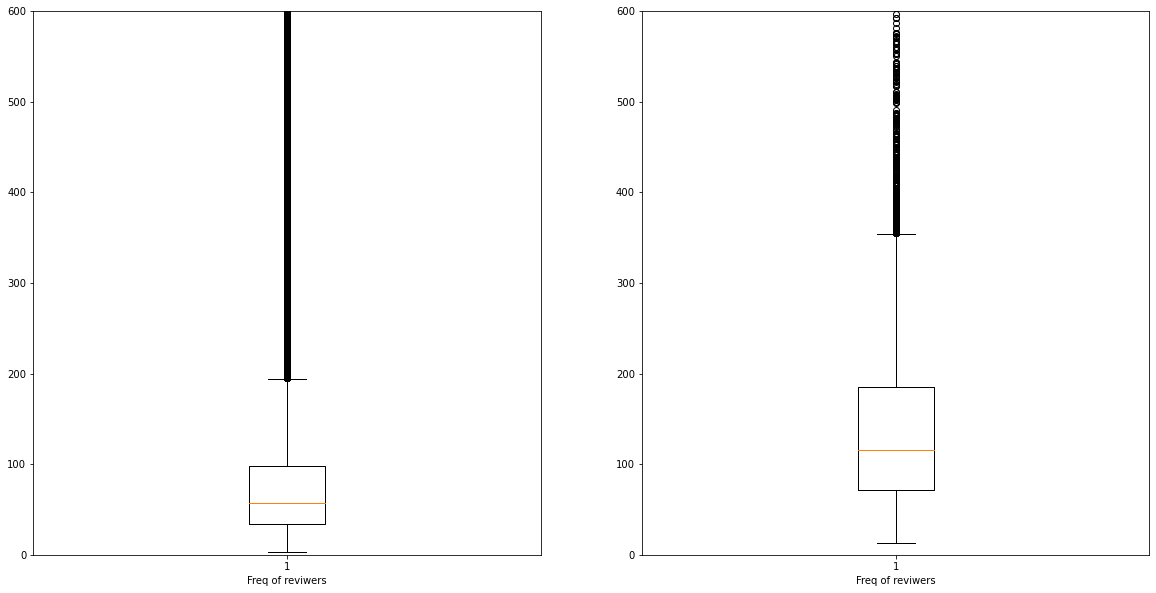

In [43]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.boxplot(freq_df['Text_lenght'])
ax1.set_xlabel('Freq of reviwers')
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_df['Text_lenght'])
ax2.set_xlabel('Freq of reviwers')
ax2.set_ylim(0,600)

plt.show()

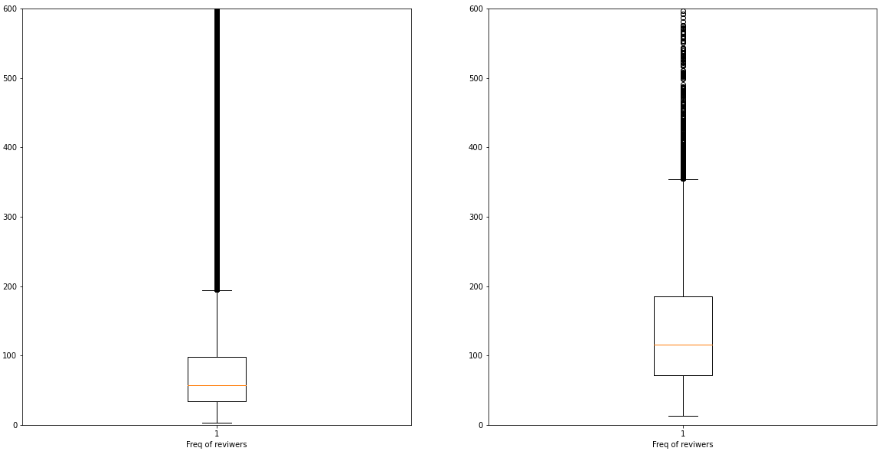

## Perform sentiment analysis

In [44]:
#!pip install textblob

In [45]:
from textblob import TextBlob

In [46]:
data['Summary'][0]

'Good Quality Dog Food'

In [47]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [48]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [49]:
sample = data[0:50000]

In [53]:
sample['Polarity'] = sample['Summary'].apply(calculate_sentiment)

In [54]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_lenght,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,frequent,30,0.8


In [58]:
#bad reviews
sample_negative = sample[sample['Polarity']<0]
sample_negative.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_lenght,Polarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,2012-09-20,poor taste,I love eating them and they are good for watch...,frequent,42,-0.400
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",frequent,22,-1.000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,2012-05-05,How can you go wrong!,"It is chocolate, what can I say. Great variet...",frequent,36,-0.625
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,2011-10-24,pretty expensive,"This bag of candy online is pretty expensive, ...",frequent,30,-0.125
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,2008-07-06,stale product.,Arrived in 6 days and were so stale i could no...,frequent,17,-0.500


In [59]:
#good reviews
sample_positive = sample[sample['Polarity']>0]
sample_positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_lenght,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,frequent,49,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,frequent,30,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...,frequent,72,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,frequent,53,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,2012-05-03,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,frequent,28,1.000000


In [61]:
from collections import Counter

In [62]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [63]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]